In [392]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import shap

In [298]:
pd.options.display.max_columns = 91
pd.options.display.max_rows = 100

In [309]:
transfers = pd.read_csv("C:\\Users\\soere\\Bachelorarbeit\\datasets\\transfers_dataset_merged.csv")

In [310]:
transfers

,Saison,Spieler,Position,Alter,Marktwert,Nationalität,Abgebender Verein,Abgebende Liga,Aufnehmender Verein,Aufnehmende Liga,Ablöse,Transfer Typ,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,Gls p90,Ast p90,G+A p90,G-PK p90,G+A-PK p90,xG p90,xAG p90,xG+xAG p90,npxG p90,npxG+xAG p90,npxG+xAG.1,overall,potential,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,xGoalDiff
0,18,Kylian Mbappé,Centre-Forward,19,120.0,France,Monaco,Ligue 1,Paris SG,Ligue 1,180.0,Dauerhaft,1,1.0,74.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2,0.0,0.2,6.0,3.0,12.0,0.00,0.00,0.00,0.00,0.00,0.19,0.00,0.19,0.19,0.19,87,95,Right,4,5,3,High/Medium,Lean (170-185),96.0,81.0,79.0,89.0,39.0,72.0,76,86,77,82,78,89,77,63,73,90,96,96,92,85,83,79,75,83,71,76,62,38,85,84,70,86.0,34,34,32,13,5,7,11,6,NaN,-0.2
1,18,Riyad Mahrez,Right Winger,27,50.0,Algeria,Leicester,Premier League,Man City,Premier League,67.8,Dauerhaft,36,34.0,2950.0,32.8,12.0,10.0,22.0,12.0,0.0,0.0,2.0,0.0,6.5,6.5,7.2,13.8,121.0,190.0,191.0,0.37,0.31,0.67,0.37,0.67,0.20,0.22,0.42,0.20,0.42,85,85,Left,4,5,3,Medium/Medium,Lean (170-185),85.0,79.0,81.0,90.0,37.0,59.0,81,80,48,82,72,91,84,78,76,89,88,83,93,77,88,79,61,76,55,81,48,38,80,81,77,86.0,44,31,18,15,9,13,11,6,NaN,5.5
2,18,Thibaut Courtois,Goalkeeper,26,65.0,Belgium,Chelsea,Premier League,Real Madrid,LaLiga,35.0,Dauerhaft,35,35.0,3150.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,90,91,Left,3,1,4,Medium/Medium,Unique,NaN,NaN,NaN,NaN,NaN,NaN,14,14,13,33,12,13,19,20,35,23,46,52,61,84,45,36,68,38,70,17,23,15,13,44,27,66.0,20,18,16,87,91,74,87,88,49.0,0.0
3,18,Alisson,Goalkeeper,25,60.0,Brazil,AS Roma,Serie A,Liverpool,Premier League,62.5,Dauerhaft,37,37.0,3330.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,85,90,Right,3,1,3,Medium/Medium,Normal (185+),NaN,NaN,NaN,NaN,NaN,NaN,17,13,19,45,20,27,19,18,44,30,54,45,40,83,37,21,52,32,78,14,27,11,13,66,23,65.0,15,19,16,82,81,85,83,88,49.0,0.0
4,18,Gonzalo Higuaín,Centre-Forward,30,55.0,Argentina,Juventus,Serie A,AC Milan,Serie A,10.2,Dauerhaft,35,32.0,2815.0,31.3,16.0,5.0,21.0,15.0,1.0,2.0,4.0,0.0,11.8,10.2,3.4,13.6,68.0,62.0,195.0,0.51,0.16,0.67,0.48,0.64,0.38,0.11,0.48,0.33,0.43,88,88,Right,4,3,4,High/Medium,Normal (170-185),73.0,87.0,70.0,83.0,31.0,74.0,68,92,80,75,90,84,74,62,59,85,73,73,75,86,69,86,79,70,85,80,50,20,92,74,70,86.0,35,22,18,5,12,7,5,10,NaN,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3014,23,Tomas Suslov,Attacking Midfield,21,2.0,Slovakia,FC Groningen,Keuken Kampioen Divisie,Hellas Verona,Serie A,1.0,Dauerhaft,30,26.0,2123.0,23.6,1.0,1.0,2.0,1.0,0.0,0.0,6.0,0.0,2.3,2.3,2.7,5.0,42.0,77.0,68.0,0.04,0.04,0.08,0.04,0.08,0.10,0.12,0.21,0.10,0.21,68,76,Left,3,3,1,Medium/Medium,Stocky (170-185),71.0,66.0,67.0,72.0,51.0,66.0,67,62,45,65,56

In [311]:
transfers.isnull().sum().to_frame('nulls')

,nulls
Saison,0
Spieler,0
Position,0
Alter,0
Marktwert,0
Nationalität,0
Abgebender Verein,0
Abgebende Liga,0
Aufnehmender Verein,0
Aufnehmende Liga,0


In [312]:
for col in transfers.select_dtypes(include='number').columns:
    if col == "Ablöse":
        transfers[col].fillna(0, inplace=True)
    else: 
        transfers[col].fillna(transfers[col].median(), inplace=True)

Ablöse geändert


C:\Users\soere\AppData\Local\Temp\ipykernel_12828\3344075600.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  transfers[col].fillna(transfers[col].median(), inplace=True)
C:\Users\soere\AppData\Local\Temp\ipykernel_12828\3344075600.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

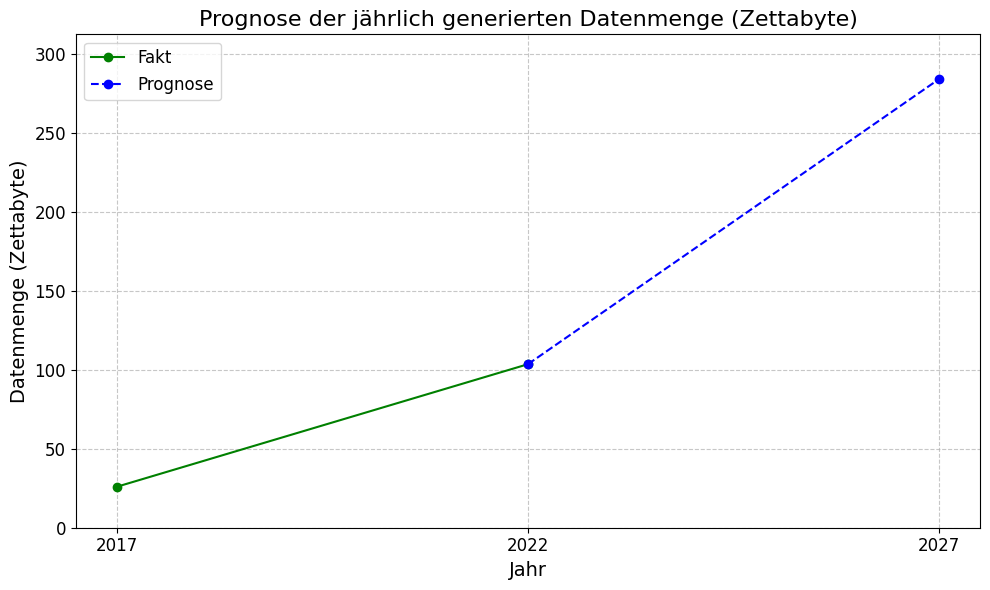

In [399]:
years = [2017, 2022, 2027]
data_volume = [26, 103.66, 284.33]

plt.figure(figsize=(10, 6))
plt.plot(years[:2], data_volume[:2], marker='o', color='g', label='Fakt')
plt.plot(years[1:], data_volume[1:], marker='o', linestyle='--', color='b', label='Prognose')

plt.title('Prognose der jährlich generierten Datenmenge (Zettabyte)', fontsize=16)
plt.xlabel('Jahr', fontsize=14)
plt.ylabel('Datenmenge (Zettabyte)', fontsize=14)
plt.xticks(years, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, max(data_volume) * 1.1)  # Ensure y-axis starts at 0
plt.grid(linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()

plt.savefig('C:\\Users\\soere\\Bachelorarbeit\\figs\\generierte datenmenge.png', bbox_inches='tight')

plt.show()

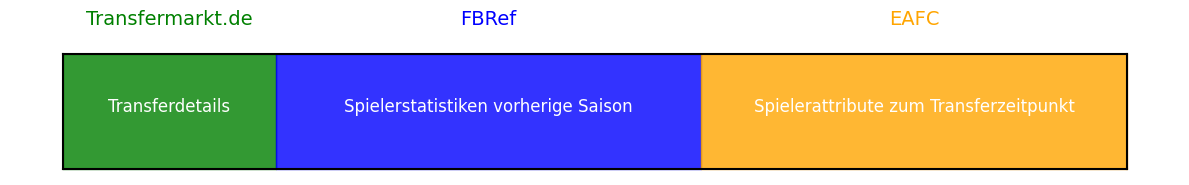

In [436]:
# Data for timeline
sources = ["Transfermarkt.de", "FBRef", "EAFC"]
percentages = [20, 40, 40]
cumulative_percentages = [sum(percentages[:i+1]) for i in range(len(percentages))]
colors = ["green", "blue", "orange"]
examples = [
    "Transferdetails",
    "Spielerstatistiken vorherige Saison",
    "Spielerattribute zum Transferzeitpunkt"
]

# Create the timeline
plt.figure(figsize=(12, 2))

# Add the filled areas and text
for i, source in enumerate(sources):
    # Fill the area with thin height
    plt.fill_between(
        [cumulative_percentages[i] - percentages[i], cumulative_percentages[i]],
        0.99, 1.01,
        color=colors[i],
        alpha=0.8
    )
    # Add source labels closer to the filled area
    plt.text(cumulative_percentages[i] - percentages[i] / 2, 1.015, source, fontsize=14, ha='center', color=colors[i])
    # Add example labels inside the filled area
    plt.text(cumulative_percentages[i] - percentages[i] / 2, 1.0, examples[i], fontsize=12, ha='center', color='white')

# Add a border around the filled area
plt.plot([0, 100], [0.99, 0.99], color='black', lw=1.5)  # Bottom border
plt.plot([0, 100], [1.01, 1.01], color='black', lw=1.5)  # Top border
plt.plot([0, 0], [0.99, 1.01], color='black', lw=1.5)  # Left border
plt.plot([100, 100], [0.99, 1.01], color='black', lw=1.5)  # Right border

# Remove outer axes and enhance visualization
plt.axis('off')  # Turn off outer axes
plt.tight_layout()

# Show the plot
plt.show()

Explorative Analyse

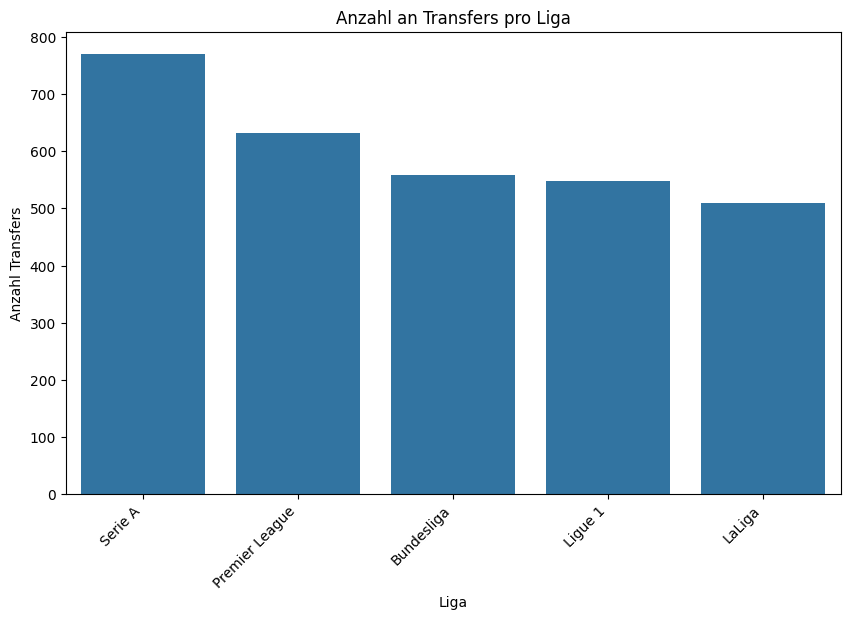

In [242]:
league_counts = transfers['Aufnehmende Liga'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=league_counts.index, y=league_counts.values)
plt.title('Anzahl an Transfers pro Liga')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Liga')
plt.ylabel('Anzahl Transfers')
plt.savefig('C:\\Users\\soere\\Bachelorarbeit\\figs\\top_ligen.png', bbox_inches='tight')
plt.show()

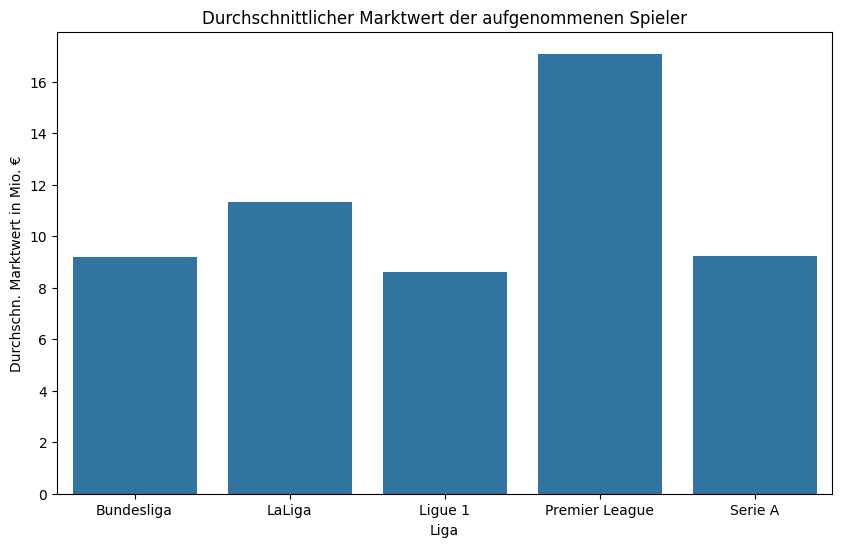

In [243]:
avg_marktwert = transfers.groupby('Aufnehmende Liga')["Marktwert"].mean(numeric_only = True)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_marktwert.index,y=avg_marktwert.values)
plt.title('Durchschnittlicher Marktwert der aufgenommenen Spieler')
plt.xlabel('Liga')
plt.ylabel('Durchschn. Marktwert in Mio. €')
plt.savefig('C:\\Users\\soere\\Bachelorarbeit\\figs\\aufgenommene_spieler_marktwert_liga.png', bbox_inches='tight')
plt.show()

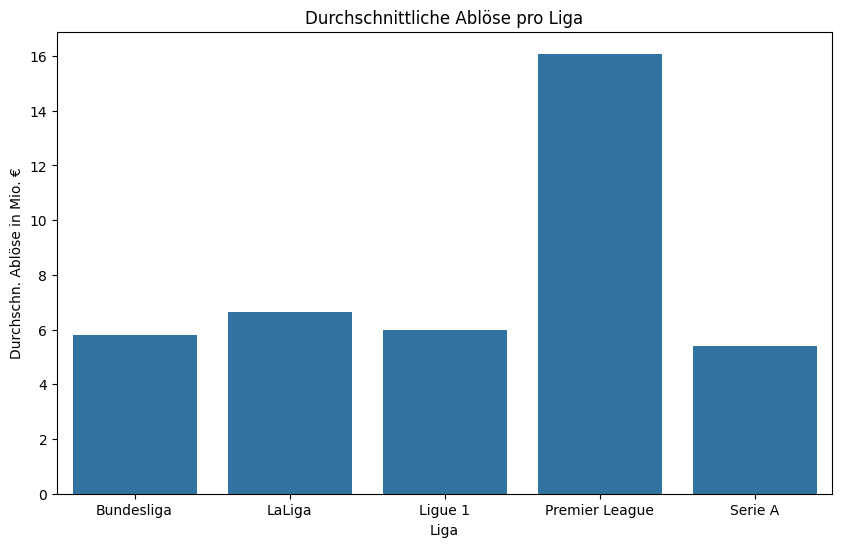

In [313]:
avg_ablöse = transfers.groupby('Aufnehmende Liga')["Ablöse"].mean(numeric_only = True)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_ablöse.index,y=avg_ablöse.values)
plt.title('Durchschnittliche Ablöse pro Liga')
plt.xlabel('Liga')
plt.ylabel('Durchschn. Ablöse in Mio. €')
plt.savefig('C:\\Users\\soere\\Bachelorarbeit\\figs\\aufgenommene_spieler_ablöse_liga.png', bbox_inches='tight')
plt.show()

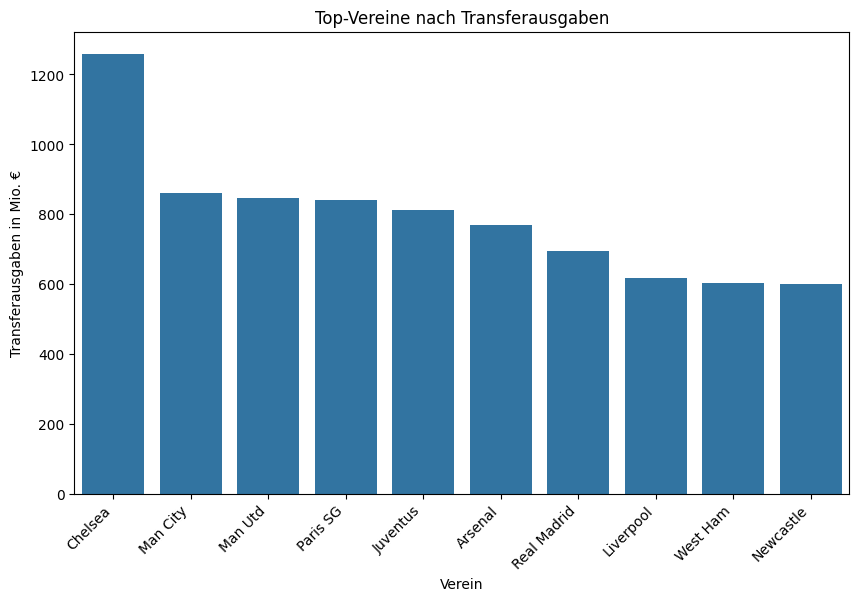

In [314]:
top_clubs = transfers.groupby('Aufnehmender Verein')['Ablöse'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_clubs.index, y=top_clubs.values)
plt.title('Top-Vereine nach Transferausgaben')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Verein')
plt.ylabel('Transferausgaben in Mio. €')
plt.savefig('C:\\Users\\soere\\Bachelorarbeit\\figs\\top_vereine_ausgaben.png', bbox_inches='tight')
plt.show()

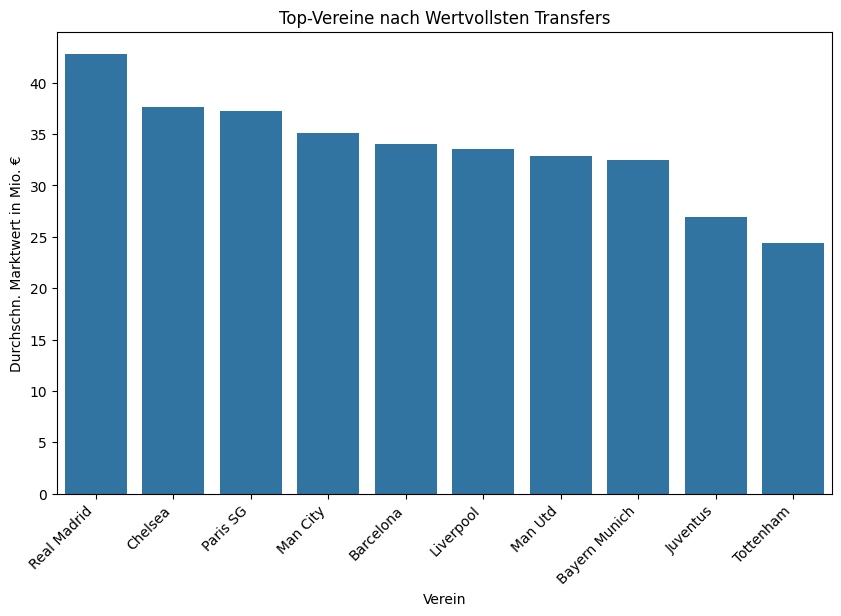

In [304]:
top_clubs = transfers.groupby('Aufnehmender Verein')['Marktwert'].mean().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_clubs.index, y=top_clubs.values)
plt.title('Top-Vereine nach Wertvollsten Transfers')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Verein')
plt.ylabel('Durchschn. Marktwert in Mio. €')
plt.savefig('C:\\Users\\soere\\Bachelorarbeit\\figs\\top_vereine_marktwert.png', bbox_inches='tight')
plt.show()

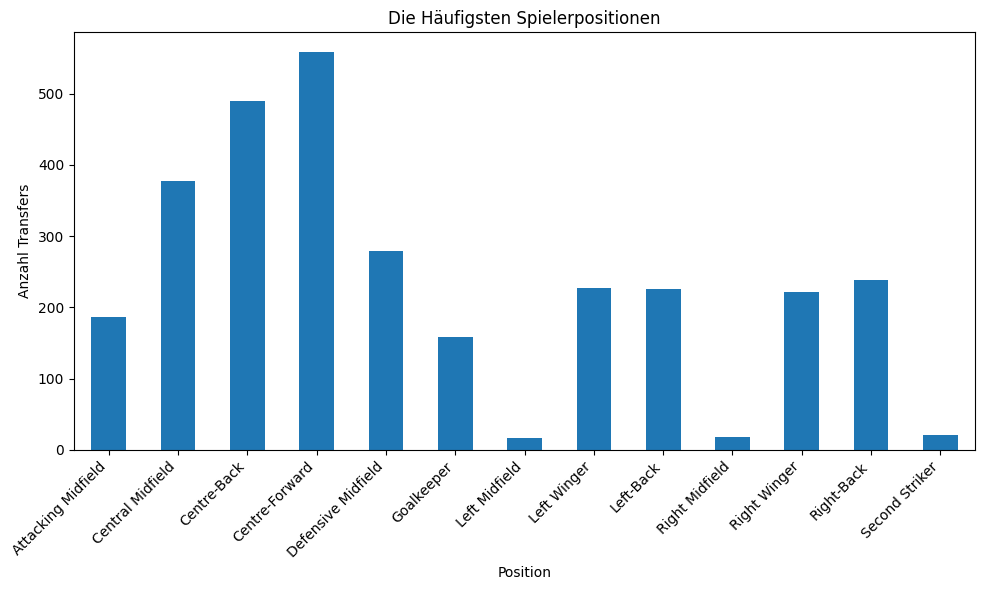

In [305]:
transfers_by_position = transfers.groupby('Position')['Position'].count()
plt.figure(figsize=(10, 6))
transfers_by_position.plot(kind='bar')
plt.title('Die Häufigsten Spielerpositionen')
plt.xlabel('Position')
plt.ylabel('Anzahl Transfers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

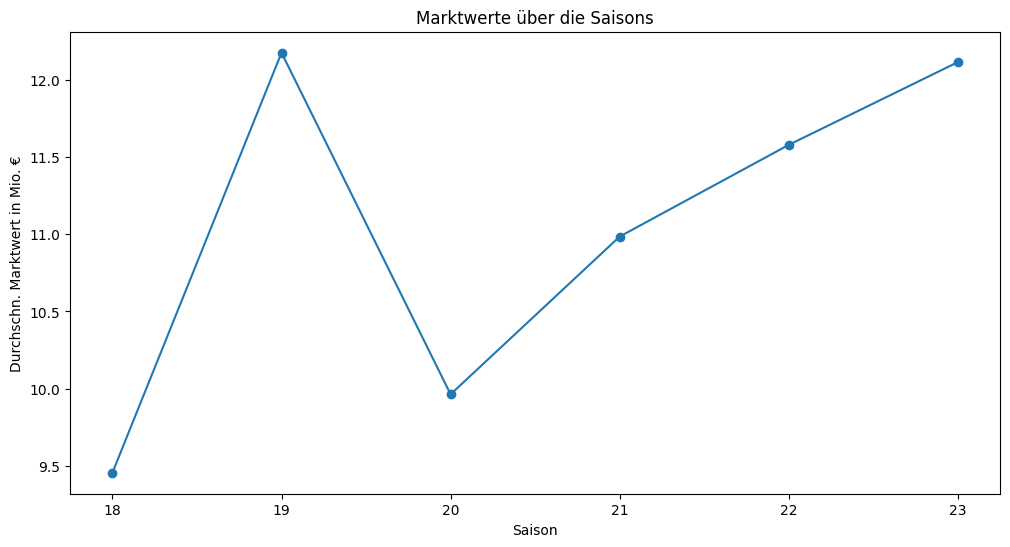

In [315]:
plt.figure(figsize=(12, 6))
transfers.groupby(transfers['Saison'])['Marktwert'].mean().plot(kind='line', marker='o')
plt.title('Marktwerte über die Saisons')
plt.xlabel('Saison')
plt.ylabel('Durchschn. Marktwert in Mio. €')
plt.show()

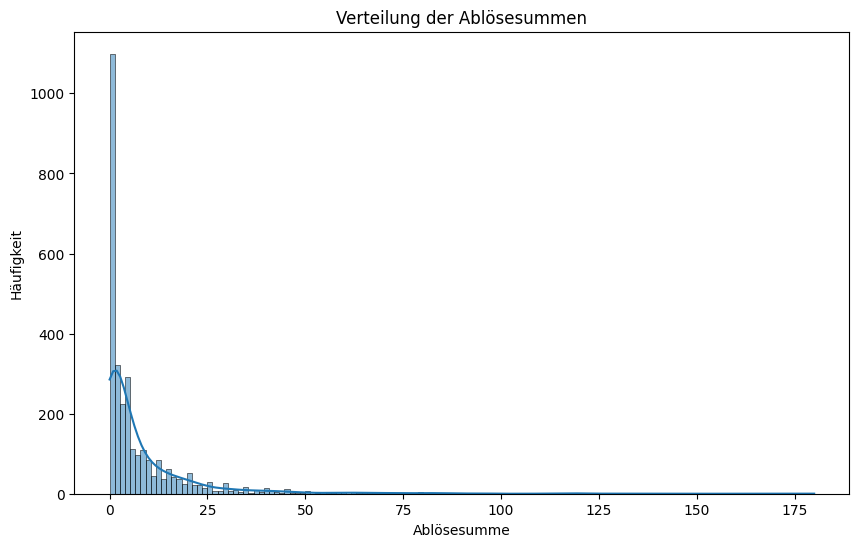

In [316]:
plt.figure(figsize=(10, 6))
sns.histplot(transfers['Ablöse'], kde=True)
plt.title('Verteilung der Ablösesummen')
plt.xlabel('Ablösesumme')
plt.ylabel('Häufigkeit')
plt.show()

C:\Users\soere\AppData\Local\Temp\ipykernel_12828\970186275.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Position', data=transfers, order=position_counts.index, palette='viridis')


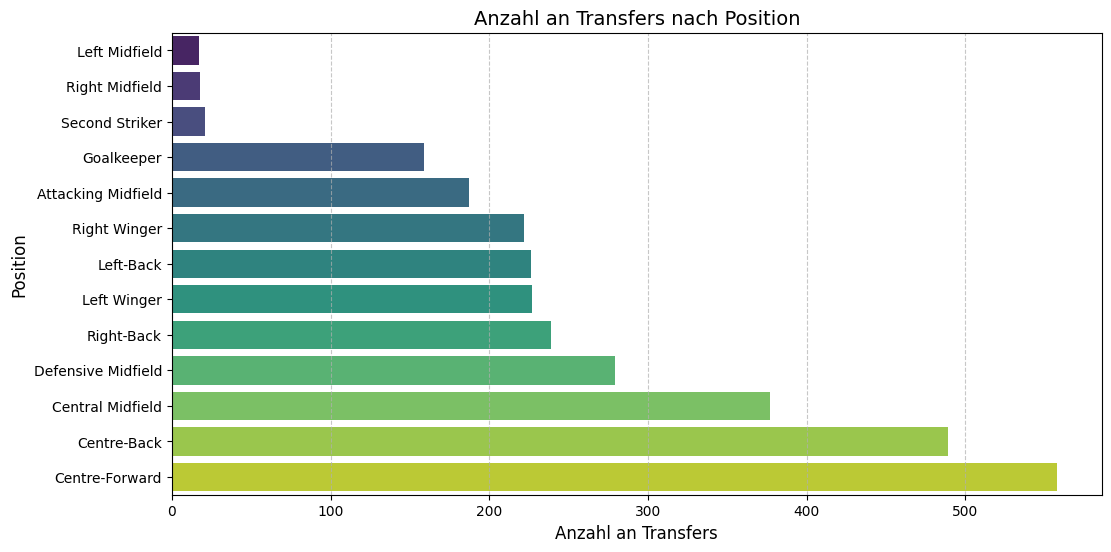

In [250]:
plt.figure(figsize=(12, 6))

# Sort by frequency in ascending order
position_counts = transfers['Position'].value_counts(ascending=True)
sns.countplot(y='Position', data=transfers, order=position_counts.index, palette='viridis')

# Add titles and labels
plt.title('Anzahl an Transfers nach Position', fontsize=14)
plt.xlabel('Anzahl an Transfers', fontsize=12)
plt.ylabel('Position', fontsize=12)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

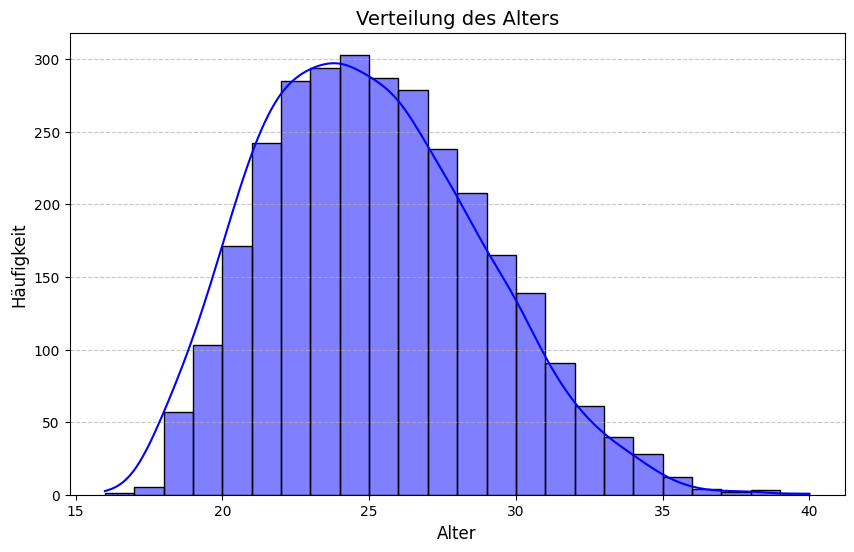

In [251]:
plt.figure(figsize=(10, 6))

sns.histplot(transfers['Alter'], kde=True, binwidth=1, color='blue')

plt.title('Verteilung des Alters', fontsize=14)
plt.xlabel('Alter', fontsize=12)
plt.ylabel('Häufigkeit', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

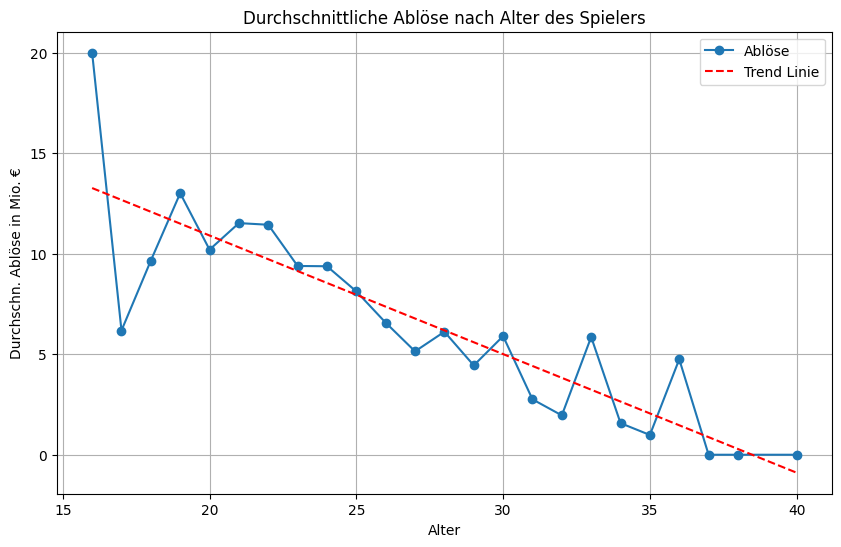

In [318]:
avg_fee_by_age = transfers.groupby('Alter')['Ablöse'].mean()
avg_fee_by_age = avg_fee_by_age.dropna()

z = np.polyfit(avg_fee_by_age.index, avg_fee_by_age.values, 1)
p = np.poly1d(z)

plt.figure(figsize=(10, 6))
plt.plot(avg_fee_by_age.index, avg_fee_by_age.values, marker='o', linestyle='-', label='Ablöse')
plt.plot(avg_fee_by_age.index, p(avg_fee_by_age.index), "r--", label='Trend Linie')

plt.xlabel('Alter')
plt.ylabel('Durchschn. Ablöse in Mio. €')
plt.title('Durchschnittliche Ablöse nach Alter des Spielers')
plt.grid(True)
plt.legend()
plt.show()

C:\Users\soere\AppData\Local\Temp\ipykernel_12828\1458767421.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_fee_by_position.values, y=avg_fee_by_position.index, palette='viridis')


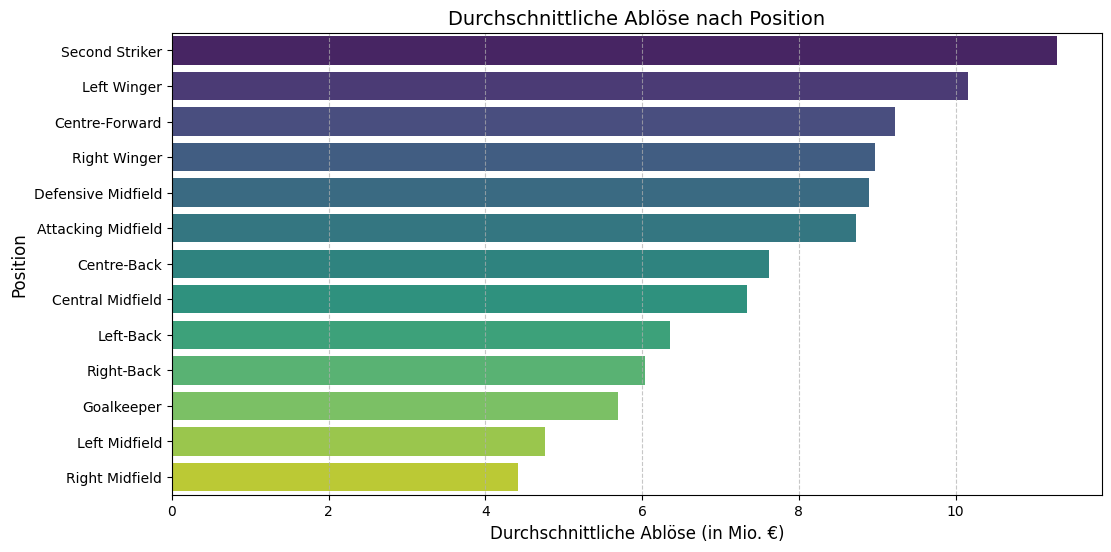

In [319]:
avg_fee_by_position = transfers.groupby('Position')['Ablöse'].mean().dropna().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_fee_by_position.values, y=avg_fee_by_position.index, palette='viridis')
plt.title('Durchschnittliche Ablöse nach Position', fontsize=14)
plt.xlabel('Durchschnittliche Ablöse (in Mio. €)', fontsize=12)
plt.ylabel('Position', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

C:\Users\soere\AppData\Local\Temp\ipykernel_12828\629628074.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_nationalities.values, y=top_nationalities.index, palette='magma')


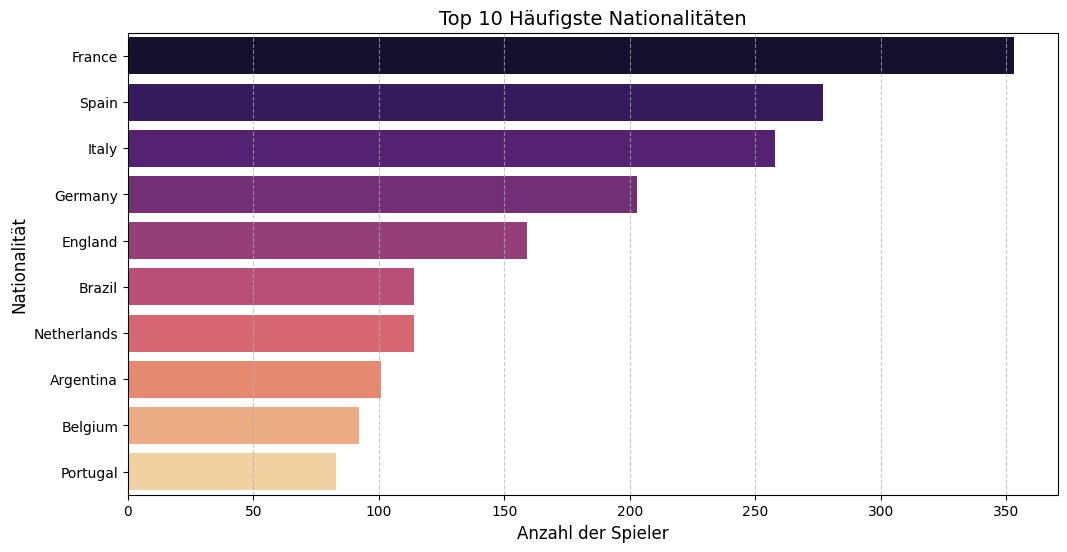

In [254]:
top_nationalities = transfers['Nationalität'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_nationalities.values, y=top_nationalities.index, palette='magma')
plt.title('Top 10 Häufigste Nationalitäten', fontsize=14)
plt.xlabel('Anzahl der Spieler', fontsize=12)
plt.ylabel('Nationalität', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [389]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, mean_squared_error, accuracy_score


# Feature selection (select relevant columns for prediction)
features = ["Alter", "Marktwert", "Position", "Nationalität", "Abgebende Liga","Abgebender Verein"]
target = "Aufnehmender Verein"  # Predicting the league

# Filter the dataset to include only necessary columns
filtered_data = transfers[features + [classification_target, regression_target]].dropna()

# Create separate encoders for each categorical column
encoders = {}
for column in ["Position", "Nationalität", "Abgebende Liga", "Abgebender Verein", "Aufnehmender Verein"]:
    if column in filtered_data.columns:
        encoders[column] = LabelEncoder()
        filtered_data[column] = encoders[column].fit_transform(filtered_data[column])

# Split the data into features (X) and target (y)
X = filtered_data[features]
y = filtered_data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
classification_model = RandomForestClassifier(n_estimators=100, random_state=42)
classification_model.fit(X_train, y_train)

# Make predictions
y_pred = classification_model.predict(X_test)

# Feature selection for regression
regression_target = "Ablöse"

# Split the data into features (X) and targets (y_classification and y_regression)
y_regression = filtered_data[regression_target]

# Train-test split
X_train, X_test, y_train_regression, y_test_regression = train_test_split(
    X, y_regression, test_size=0.2, random_state=42
)

# Initialize and train the regression model
regression_model = RandomForestRegressor(n_estimators=100, random_state=42)
regression_model.fit(X_train, y_train_regression)

# Make predictions
y_pred_regression = regression_model.predict(X_test)

# Evaluate the regression model
print("\nRegression Model Evaluation:")
print("Mean Squared Error:", mean_squared_error(y_test_regression, y_pred_regression))

# Evaluate the model
print(" ")
print("\nClassification Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Regression Model Evaluation:
Mean Squared Error: 84.16982055855638
 

Classification Model Evaluation:
Accuracy: 0.08278145695364239
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         0
           5       0.17      0.09      0.12        11
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         2
           9       0.25      0.50      0.33         4
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00        12
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         3
          16       0.00      0.

C:\Users\soere\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\soere\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\soere\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\soere\miniconda3\Lib\site-packages\s

In [390]:
def predict_multi_targets(player_attributes, encoders, classification_model, regression_model):
    """
    Predict multiple targets for a given player's attributes.
    player_attributes: dict containing "Alter", "Marktwert", "Position", "Nationalität", "Abgebende Liga"
    encoders: Dictionary of LabelEncoders for categorical columns
    classification_model: Trained RandomForestClassifier
    regression_model: Trained RandomForestRegressor
    Returns: Predicted target club and transfer fee
    """
    # Encode the player's attributes
    encoded_player = player_attributes.copy()
    for column in ["Position", "Nationalität", "Abgebende Liga", "Abgebender Verein"]:
        if column in encoders:
            encoded_player[column] = encoders[column].transform([player_attributes[column]])[0]

    # Convert to the correct format for prediction
    player_array = [encoded_player[feature] for feature in features]

    # Predict classification target
    predicted_classification = classification_model.predict([player_array])[0]

    # Decode the classification prediction back to original label
    predicted_club = encoders["Aufnehmender Verein"].inverse_transform([predicted_classification])[0]

    # Predict regression target
    predicted_transfer_fee = regression_model.predict([player_array])[0]

    return predicted_club, predicted_transfer_fee

In [391]:
example_player = {
    "Alter": 18,
    "Marktwert": 2.5,  # in million
    "Position": "Centre-Forward",
    "Nationalität": "France",
    "Abgebende Liga": "Ligue 1",
    "Abgebender Verein": "Angers SCO"
}

predicted_club, predicted_fee = predict_multi_targets(
    example_player, encoders, classification_model, regression_model
)
print("Predicted Club:", predicted_club)
print("Predicted Transfer Fee:", predicted_fee)

Predicted Club: E. Frankfurt
Predicted Transfer Fee: 5.108


C:\Users\soere\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\soere\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [259]:
def plot_important_features_for_premier_league(model, features, encoders, league):
    """
    Plot the most important features for predicting the Premier League.
    model: Trained RandomForestClassifier model
    features: List of feature names
    encoders: Dictionary of LabelEncoders for categorical columns
    """
    # Get the index of the Premier League
    league_index = encoders["Aufnehmende Liga"].transform([league])[0]

    # Use SHAP to analyze feature importance
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)

    # Extract SHAP values for the Premier League
    league_shap_values = shap_values[league_index]

    # Calculate mean absolute SHAP values for each feature
    feature_importance = abs(league_shap_values).mean(axis=0)

    # Combine features and their importance
    importance = list(zip(features, feature_importance))

    # Sort by importance
    sorted_importance = sorted(importance, key=lambda x: x[1], reverse=True)

    # Plot the feature importance
    plt.figure(figsize=(10, 6))
    plt.barh([x[0] for x in sorted_importance], [x[1] for x in sorted_importance], align='center')
    plt.gca().invert_yaxis()  # Highest importance at the top
    plt.xlabel("SHAP Value (Mean Absolute)")
    plt.title(f"Most Important Features for Predicting {league}")
    plt.show()

In [260]:
plot_important_features_for_premier_league(model, features, encoders, "Premier League")

KeyError: 'Aufnehmende Liga'

In [261]:
transfers

,Saison,Spieler,Position,Alter,Marktwert,Nationalität,Abgebender Verein,Abgebende Liga,Aufnehmender Verein,Aufnehmende Liga,Ablöse,Transfer Typ,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,Gls p90,Ast p90,G+A p90,G-PK p90,G+A-PK p90,xG p90,xAG p90,xG+xAG p90,npxG p90,npxG+xAG p90,npxG+xAG.1,overall,potential,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,xGoalDiff
0,18,Kylian Mbappé,Centre-Forward,19,120.0,France,Monaco,Ligue 1,Paris SG,Ligue 1,180.0,Dauerhaft,1,1.0,74.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2,0.0,0.2,6.0,3.0,12.0,0.00,0.00,0.00,0.00,0.00,0.19,0.00,0.19,0.19,0.19,87,95,Right,4,5,3,High/Medium,Lean (170-185),96.0,81.0,79.0,89.0,39.0,72.0,76,86,77,82,78,89,77,63,73,90,96,96,92,85,83,79,75,83,71,76,62,38,85,84,70,86.0,34,34,32,13,5,7,11,6,NaN,-0.2
1,18,Riyad Mahrez,Right Winger,27,50.0,Algeria,Leicester,Premier League,Man City,Premier League,67.8,Dauerhaft,36,34.0,2950.0,32.8,12.0,10.0,22.0,12.0,0.0,0.0,2.0,0.0,6.5,6.5,7.2,13.8,121.0,190.0,191.0,0.37,0.31,0.67,0.37,0.67,0.20,0.22,0.42,0.20,0.42,85,85,Left,4,5,3,Medium/Medium,Lean (170-185),85.0,79.0,81.0,90.0,37.0,59.0,81,80,48,82,72,91,84,78,76,89,88,83,93,77,88,79,61,76,55,81,48,38,80,81,77,86.0,44,31,18,15,9,13,11,6,NaN,5.5
2,18,Thibaut Courtois,Goalkeeper,26,65.0,Belgium,Chelsea,Premier League,Real Madrid,LaLiga,35.0,Dauerhaft,35,35.0,3150.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,90,91,Left,3,1,4,Medium/Medium,Unique,NaN,NaN,NaN,NaN,NaN,NaN,14,14,13,33,12,13,19,20,35,23,46,52,61,84,45,36,68,38,70,17,23,15,13,44,27,66.0,20,18,16,87,91,74,87,88,49.0,0.0
3,18,Alisson,Goalkeeper,25,60.0,Brazil,AS Roma,Serie A,Liverpool,Premier League,62.5,Dauerhaft,37,37.0,3330.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,85,90,Right,3,1,3,Medium/Medium,Normal (185+),NaN,NaN,NaN,NaN,NaN,NaN,17,13,19,45,20,27,19,18,44,30,54,45,40,83,37,21,52,32,78,14,27,11,13,66,23,65.0,15,19,16,82,81,85,83,88,49.0,0.0
4,18,Gonzalo Higuaín,Centre-Forward,30,55.0,Argentina,Juventus,Serie A,AC Milan,Serie A,10.2,Dauerhaft,35,32.0,2815.0,31.3,16.0,5.0,21.0,15.0,1.0,2.0,4.0,0.0,11.8,10.2,3.4,13.6,68.0,62.0,195.0,0.51,0.16,0.67,0.48,0.64,0.38,0.11,0.48,0.33,0.43,88,88,Right,4,3,4,High/Medium,Normal (170-185),73.0,87.0,70.0,83.0,31.0,74.0,68,92,80,75,90,84,74,62,59,85,73,73,75,86,69,86,79,70,85,80,50,20,92,74,70,86.0,35,22,18,5,12,7,5,10,NaN,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3014,23,Tomas Suslov,Attacking Midfield,21,2.0,Slovakia,FC Groningen,Keuken Kampioen Divisie,Hellas Verona,Serie A,1.0,Dauerhaft,30,26.0,2123.0,23.6,1.0,1.0,2.0,1.0,0.0,0.0,6.0,0.0,2.3,2.3,2.7,5.0,42.0,77.0,68.0,0.04,0.04,0.08,0.04,0.08,0.10,0.12,0.21,0.10,0.21,68,76,Left,3,3,1,Medium/Medium,Stocky (170-185),71.0,66.0,67.0,72.0,51.0,66.0,67,62,45,65,56